# Basics

This is notebook for excersises with [PyTorch](https://pytorch.ord) framework.

In [1]:
# Import modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import halper
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import datasets, transforms

In [2]:
# Define activation functions
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    """TanH (Hyperbolic Tangent Function) activation function"""
    return torch.tanh(x)

relu = nn.ReLU()

## Single Neuron

In [3]:
# Generate random data
torch.manual_seed(7)

# Init features, weights, bias
features = torch.randn(1, 5)
weights = torch.randn_like(features)
bias = torch.randn(1, 1)

In [4]:
print("Features: ", features)
print("Weights: ", weights)
print("Bias: ", bias)

Features:  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
Weights:  tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
Bias:  tensor([[0.3177]])


In [5]:
# Calculate output
y = sigmoid(torch.sum(features * weights) + bias)
y

tensor([[0.1595]])

In [6]:
# Calculate output using matrix multiplication
y = sigmoid(torch.mm(features, weights.view(5,1)) + bias)
y

tensor([[0.1595]])

## Stack neurons to layers

In [7]:
# Define the structure
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# Bias terms for hidden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)

In [8]:
print("Features: ", features)
print("Input: ", features.shape[1])
print("W1: ", W1)
print("W2: ", W2)
print("B1: ", B1)
print("B2: ", B2)

Features:  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
Input:  5
W1:  tensor([[0.1328, 0.1373],
        [0.2405, 1.3955],
        [1.3470, 2.4382],
        [0.2028, 2.4505],
        [2.0256, 1.7792]])
W2:  tensor([[-0.9179],
        [-0.4578]])
B1:  tensor([[-0.7245,  1.2799]])
B2:  tensor([[-0.9941]])


In [9]:
h = relu(torch.mm(features, W1) + B1)
y = sigmoid(torch.mm(h, W2) + B2)
y

tensor([[0.0011]])

## Network for image number recognition

In [10]:
# Define a transformations to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


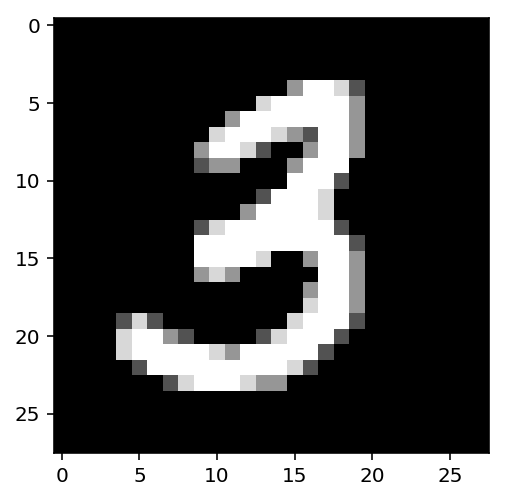

In [12]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [13]:
# Define the structure
n_inp = 784    # Number of input units
n_hid = 256    # Number of hidden units 
n_out = 10     # Number of output units

inputs = images.view(images.shape[0], -1)

# Weights for inputs to hidden layer
w1 = torch.randn(n_inp, n_hid)
w2 = torch.randn(n_hid, n_out)

# Bias terms for hidden and output layers
b1 = torch.randn(1, n_hid)
b2 = torch.randn(1, n_out)

In [14]:
hid = sigmoid(torch.mm(inputs, w1) + b1)
out = torch.mm(hid, w2) + b2
out

tensor([[  3.4650,  -9.3836,  -9.9485,   9.4702,  10.0684,  16.0961,  -6.2732,
           2.8965,  -0.6581,   4.4914],
        [ -3.4401,  -2.1008,  -1.0362,  14.2685,  -2.7966,  -0.1972,  -2.3134,
           0.1276,  -3.9340,  10.3931],
        [  4.1170,  -4.4916,  14.4495,   3.8711,  11.7530,   6.0813,  -6.8356,
           4.0926,  -3.3715,  -1.5335],
        [  0.9149,  -6.5682,   7.9304,  16.4015,  10.8328,   8.0136,  -4.4967,
           4.8189,  -4.2965,   5.9058],
        [  5.5597,  -8.4811,  -2.5871,  14.7395,  13.2668,  18.1413,   2.6496,
          -1.2208,  -4.2804,   5.2748],
        [ -2.9577, -10.8776,  -3.9198,  18.8121,  -0.8268,   9.4067,   5.6384,
          10.1557,  -0.2571,   2.3656],
        [ -0.4996,  -7.9370,  -1.3912,  11.4435,   5.0798,  13.4650,  -7.8572,
           4.2008,  -8.0562,   0.5859],
        [ -9.0681, -10.0080,   3.7154,  13.8048,   1.2239,  14.2243,  -5.0702,
           0.3474,  -6.0579,   4.3319],
        [  6.4393,  -4.9171,   3.4406,   6.0519,

In [15]:
out.shape

torch.Size([64, 10])

In [16]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [17]:
# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [18]:
probabilities

tensor([[3.2564e-06, 8.5643e-12, 4.8680e-12, 1.3206e-03, 2.4021e-03, 9.9626e-01,
         1.9210e-10, 1.8443e-06, 5.2736e-08, 9.0885e-06],
        [1.9968e-08, 7.6205e-08, 2.2097e-07, 9.7967e-01, 3.8003e-08, 5.1135e-07,
         6.1607e-08, 7.0757e-07, 1.2185e-08, 2.0324e-02],
        [3.0492e-05, 5.5655e-09, 9.3654e-01, 2.3844e-05, 6.3163e-02, 2.1740e-04,
         5.3401e-10, 2.9757e-05, 1.7060e-08, 1.0720e-07],
        [1.8725e-07, 1.0532e-10, 2.0853e-04, 9.9573e-01, 3.7990e-03, 2.2663e-04,
         8.3590e-10, 9.2876e-06, 1.0212e-09, 2.7538e-05],
        [3.2994e-06, 2.6338e-12, 9.5572e-10, 3.2002e-02, 7.3385e-03, 9.6065e-01,
         1.7973e-07, 3.7473e-09, 1.7576e-10, 2.4816e-06],
        [3.5107e-10, 1.2759e-13, 1.3414e-10, 9.9974e-01, 2.9568e-09, 8.2257e-05,
         1.8995e-06, 1.7396e-04, 5.2268e-09, 7.1986e-08],
        [7.6051e-07, 4.4783e-10, 3.1182e-07, 1.1693e-01, 2.0147e-04, 8.8278e-01,
         4.8500e-10, 8.3654e-05, 3.9751e-10, 2.2519e-06],
        [4.6219e-11, 1.8055

## Building network for image number recognition

In [19]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [20]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [21]:
class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 128)
        # Second hidden
        self.hidden2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # 1 hidden layer with relu activation
        x = F.relu(self.hidden1(x))
        # 2 hidden layer with relu activation
        x = F.relu(self.hidden2(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [22]:
model = Network1()
model

Network1(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
print(model.hidden1.weight)
print(model.hidden1.bias)
print(model.hidden2.weight)
print(model.hidden2.bias)

Parameter containing:
tensor([[ 0.0340,  0.0067,  0.0152,  ...,  0.0171, -0.0345,  0.0263],
        [ 0.0049, -0.0070,  0.0175,  ..., -0.0035, -0.0112,  0.0164],
        [ 0.0284,  0.0210, -0.0287,  ...,  0.0231, -0.0279, -0.0132],
        ...,
        [-0.0257, -0.0091, -0.0303,  ...,  0.0010,  0.0221,  0.0105],
        [ 0.0015, -0.0126,  0.0071,  ...,  0.0034,  0.0136,  0.0090],
        [-0.0145, -0.0175,  0.0015,  ...,  0.0006, -0.0315,  0.0100]],
       requires_grad=True)
Parameter containing:
tensor([-0.0288,  0.0176,  0.0343,  0.0254, -0.0033,  0.0076, -0.0077, -0.0086,
         0.0209, -0.0210,  0.0286,  0.0117, -0.0188,  0.0013, -0.0105, -0.0211,
         0.0009,  0.0022, -0.0245,  0.0222, -0.0050, -0.0263, -0.0247, -0.0289,
         0.0260,  0.0025,  0.0036, -0.0316,  0.0287, -0.0115,  0.0257,  0.0206,
        -0.0044, -0.0181,  0.0273,  0.0284,  0.0059, -0.0242, -0.0130,  0.0023,
         0.0158,  0.0281,  0.0183,  0.0060, -0.0267, -0.0293, -0.0307, -0.0172,
         0.0064

In [24]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [25]:
# Define network architecture using wrapper
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
print(model)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get the data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass
logits = model(images)

# Calculate the loss
loss = criterion(logits, labels)

print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(2.3251, grad_fn=<NllLossBackward>)


## Network Architecture 

In [26]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [27]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        # Gradient to zero
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 1.871655824214919
Training loss: 0.8313357959360456
Training loss: 0.5254041539199317
Training loss: 0.4294451842112328
Training loss: 0.3840954667850852
Training loss: 0.35701972975342006
Training loss: 0.3382105703261107
Training loss: 0.32385340271823443
Training loss: 0.31170686775210826
Training loss: 0.3015429663108483
Training loss: 0.2928286786955684
Training loss: 0.2848892825355789
Training loss: 0.27795449352022933
Training loss: 0.2711571081360774
Training loss: 0.2644727985932629
Training loss: 0.2586706522971328
Training loss: 0.25259071639351754
Training loss: 0.24689979888578215
Training loss: 0.2411695709352745
Training loss: 0.23581177971240427


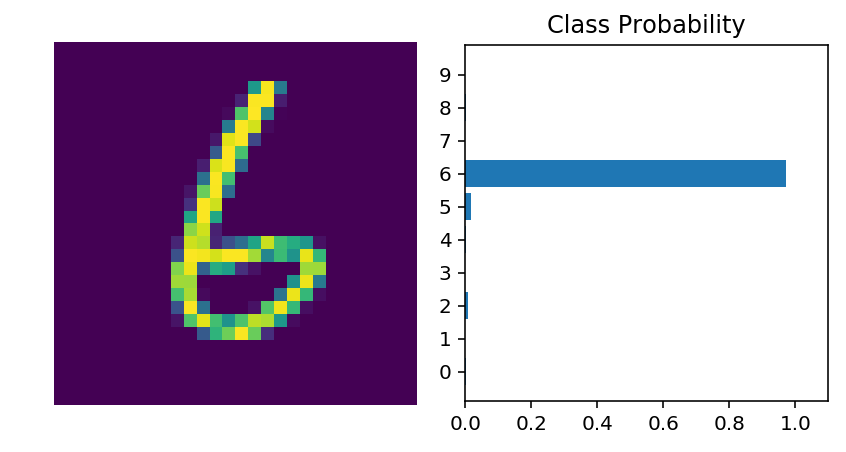

In [29]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
logps = model.forward(img)

ps = torch.exp(logps)
halper.view_classify(img.view(1, 28, 28), ps)